# Density & velocity fields alond a LOS

In [1]:
# Copyright (C) 2024 Richard Stiskalek
# This program is free software; you can redistribute it and/or modify it
# under the terms of the GNU General Public License as published by the
# Free Software Foundation; either version 3 of the License, or (at your
# option) any later version.
#
# This program is distributed in the hope that it will be useful, but
# WITHOUT ANY WARRANTY; without even the implied warranty of
# MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the GNU General
# Public License for more details.
#
# You should have received a copy of the GNU General Public License along
# with this program; if not, write to the Free Software Foundation, Inc.,
# 51 Franklin Street, Fifth Floor, Boston, MA  02110-1301, USA.
import numpy as np
import matplotlib.pyplot as plt
import jax
from jax import numpy as jnp
from numpyro.infer import MCMC, NUTS, init_to_median

import csiborgtools


%load_ext autoreload
%autoreload 2
%matplotlib inline

paths = csiborgtools.read.Paths(**csiborgtools.paths_glamdring)

## LOS density & radial velocity plots 

In [2]:
fpath = "/mnt/extraspace/rstiskalek/catalogs/PV_compilation.hdf5"

loader_carrick = csiborgtools.flow.DataLoader("Carrick2015", [0], "LOSS", fpath, paths, ksmooth=0, )
# loaders_csiborg2X = [csiborgtools.flow.DataLoader("csiborg2X", i, "LOSS", fpath, paths, ksmooth=1, verbose=False) for i in range(20)]
# loaders_csiborg2 = [csiborgtools.flow.DataLoader("csiborg2_main", i, "LOSS", fpath, paths, ksmooth=1, verbose=False) for i in range(20)]

loader_CF4 = csiborgtools.flow.DataLoader("CF4gp", [0], "LOSS", fpath, paths, ksmooth=0, )
loader_lilow = csiborgtools.flow.DataLoader("Lilow2024", [0], "LOSS", fpath, paths, ksmooth=0, )

2024-06-29 17:50:51.966497:   reading the catalogue,
2024-06-29 17:50:51.975479:   reading the interpolated field,
2024-06-29 17:50:51.984463:   calculating the radial velocity.
2024-06-29 17:50:51.993984:   reading the catalogue,
2024-06-29 17:50:52.000049:   reading the interpolated field,
2024-06-29 17:50:52.052351:   calculating the radial velocity.
2024-06-29 17:50:52.074000:   reading the catalogue,
2024-06-29 17:50:52.080335:   reading the interpolated field,
2024-06-29 17:50:52.099720:   calculating the radial velocity.


/mnt/users/rstiskalek/csiborgtools/csiborgtools/flow/flow_model.py:91: UserWarning: The number of radial steps is even. Skipping the first step at 0.0 because Simpson's rule requires an odd number of steps.
  warn(f"The number of radial steps is even. Skipping the first "


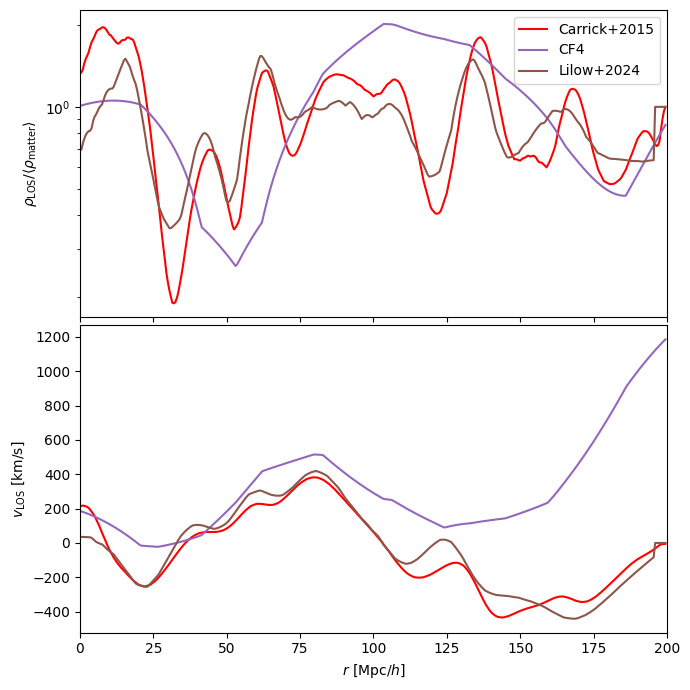

In [3]:
# ks = [i for i in range(50)]
ks = [0,]

for k in ks:
    fig, axs = plt.subplots(2, 1, figsize=(7, 7), sharex=True)
    fig.subplots_adjust(wspace=0)
    cols = plt.rcParams['axes.prop_cycle'].by_key()['color']

    # # CSiBORG2
    # x = loaders_csiborg2X[0].rdist
    # y = np.asarray([loaders_csiborg2[i].los_density[k, :] for i in range(len(loaders_csiborg2X))])
    # ylow, ymed, yhigh = np.percentile(y, [16, 50, 84], axis=0)
    # axs[0].fill_between(x, ylow, yhigh, color=cols[0], alpha=0.25)
    # axs[0].plot(x, ymed, color=cols[0], label="CSiBORG2")

    # y = np.asarray([loaders_csiborg2[i].los_radial_velocity[k, :] for i in range(len(loaders_csiborg2X))])
    # ylow, ymed, yhigh = np.percentile(y, [16, 50, 84], axis=0)
    # axs[1].fill_between(x, ylow, yhigh, color=cols[0], alpha=0.25)
    # axs[1].plot(x, ymed, color=cols[0], label="CSiBORG2")

    # # CSiBORG2X
    # x = loaders_csiborg2X[0].rdist
    # y = np.asarray([loaders_csiborg2X[i].los_density[k, :] for i in range(len(loaders_csiborg2X))])
    # ylow, ymed, yhigh = np.percentile(y, [16, 50, 84], axis=0)
    # axs[0].fill_between(x, ylow, yhigh, color=cols[1], alpha=0.25)
    # axs[0].plot(x, ymed, color=cols[1], label="CSiBORG2X")

    # y = np.asarray([loaders_csiborg2X[i].los_radial_velocity[k, :] for i in range(len(loaders_csiborg2X))])
    # ylow, ymed, yhigh = np.percentile(y, [16, 50, 84], axis=0)
    # axs[1].fill_between(x, ylow, yhigh, color=cols[1], alpha=0.25)
    # axs[1].plot(x, ymed, color=cols[1], label="CSiBORG2X")

    # Plot Carrick+2015
    axs[0].plot(loader_carrick.rdist, loader_carrick.los_density[0, k, :], color="red", label="Carrick+2015")
    axs[1].plot(loader_carrick.rdist, loader_carrick.los_radial_velocity[0, k, :] * 0.43, color="red")

    # Plot CF4
    c = cols[4]
    axs[0].plot(loader_CF4.rdist, loader_CF4.los_density[0, k, :], color=c, label="CF4")
    axs[1].plot(loader_CF4.rdist, loader_CF4.los_radial_velocity[0, k, :], color=c)

    # Plot Lilow2024
    c = cols[5]
    axs[0].plot(loader_lilow.rdist, loader_lilow.los_density[0, k, :], color=c, label="Lilow+2024")
    axs[1].plot(loader_lilow.rdist, loader_lilow.los_radial_velocity[0, k, :], color=c)


    axs[1].set_xlabel(r"$r ~ [\mathrm{Mpc} / h]$")
    axs[0].set_ylabel(r"$\rho_{\rm LOS} / \langle \rho_{\rm matter} \rangle$")
    axs[1].set_ylabel(r"$v_{\rm LOS} ~ [\mathrm{km/s}]$")
    axs[0].set_yscale("log")

    axs[0].legend(loc="upper right")
    axs[0].set_xlim(0, 200)

    fig.tight_layout(w_pad=0, h_pad=0)
    fig.savefig(f"../../plots/LOSS_los_{k}.png", dpi=500, bbox_inches="tight")

    fig.show()

## Test running a model

In [ ]:
fpath_data = "/mnt/extraspace/rstiskalek/catalogs/PV_compilation.hdf5"

simname = "CF4"
catalogue = "LOSS"
loader = csiborgtools.flow.DataLoader(simname, [0], catalogue, fpath_data, paths, ksmooth=0, )

SN_hyperparams = {"e_mu_mean": 0.1, "e_mu_std": 0.05,
                  "mag_cal_mean": -18.25, "mag_cal_std": 0.5,
                  "alpha_cal_mean": 0.148, "alpha_cal_std": 0.05,
                  "beta_cal_mean": 3.112, "beta_cal_std": 1.0,
                  }
calibration_hyperparams = {"Vext_std": 250,
                           "alpha_mean": 1.0, "alpha_std": 0.5,
                           "beta_mean": 1.0, "beta_std": 0.5,
                           "sigma_v_mean": 150., "sigma_v_std": 100.,
                           "sample_alpha": True, "sample_beta": True,
                           }
get_model_kwargs = {"zcmb_max": 0.05}

#### Running HMC

In [ ]:
model = csiborgtools.flow.get_model(loader, **get_model_kwargs)
model_kwargs = {"distmod_hyperparams": SN_hyperparams, "calibration_hyperparams": calibration_hyperparams,}

In [ ]:
kernel = NUTS(model, init_strategy=init_to_median(num_samples=100))
mcmc = MCMC(kernel, num_warmup=500, num_samples=500)

rng_key = jax.random.PRNGKey(5)
mcmc.run(rng_key, extra_fields=("potential_energy",), **model_kwargs)
mcmc.print_summary()
samples = mcmc.get_samples()